In [51]:
import pandas as pd



CSV_PATH = "/kaggle/input/processed-dataset/train_processed.csv"

df = pd.read_csv(CSV_PATH)

print(df.shape)
df.head()

df = pd.read_csv(CSV_PATH)

print(df.shape)
df.head()

(803, 6)
(803, 6)


,Image_id,Image_name,Level1,Level2,label,text
0,0,000.jpg,Troll/Oppose,Troll/Oppose Against Person,1,இனிகுலைக்காது இனி மதுக்கடை ஸ்டெர்லைட் இலங்கை த...
1,2,002.jpg,Troll/Oppose,Troll/Oppose Against Person,1,தமிழில் எழுதி ஆங்கிலத்தில் ஆங்கிலத்தில் எழுதி ...
2,3,003.jpg,Troll/Oppose,Troll/Oppose Against Person,1,t J உ மகாராஷ்டிராவில் கோவில்களை a aah உடனடியாக...
3,4,004.jpg,Troll/Oppose,Troll/Oppose Against Party,1,BREAKING NEWS சிறப்பு அந்தஸ்து ரத்து என்பது ஜன...
4,5,005.jpg,Troll/Oppose,Troll/Oppose Against Person,1,தனியார்துறையிலும் இடஒதுக்கீட்டுக்கு சட்டம் இயற...


In [2]:
df=df.drop('label',axis=1)

In [52]:
test_df=pd.read_csv('/kaggle/input/processed-dataset/test_processed.csv')
test_df.head()
test_df=test_df.drop('label',axis=1)

In [4]:
df['Level1'].value_counts()

Level1
Troll/Oppose      691
Support/Praise    112
Name: count, dtype: int64

In [53]:
df['Level2'].value_counts()

Level2
Troll/Oppose Against Person    547
Troll/Oppose Against Party     146
Support for person              86
Support for party               24
Name: count, dtype: int64

In [54]:
def map_level2(label):
    label = label.lower()

    if "person" in label:
        return 0
    elif "party" in label:
        return 1
  
    else:
        raise ValueError(f"Unknown Level-2 label: {label}")

In [55]:

LEVEL1_MAP= {
    "Support/Praise": 0,
    "Troll/Oppose": 1
}

#LEVEL2_MAP = {
   # "Person": 0,
    #"Party": 1,
    
#}

df['label1']=df['Level1'].map(LEVEL1_MAP)
df['label2']=df["Level2"].apply(map_level2)

print("Train examples:", len(df))

df.head()

Train examples: 803


,Image_id,Image_name,Level1,Level2,label,text,label1,label2
0,0,000.jpg,Troll/Oppose,Troll/Oppose Against Person,1,இனிகுலைக்காது இனி மதுக்கடை ஸ்டெர்லைட் இலங்கை த...,1,0
1,2,002.jpg,Troll/Oppose,Troll/Oppose Against Person,1,தமிழில் எழுதி ஆங்கிலத்தில் ஆங்கிலத்தில் எழுதி ...,1,0
2,3,003.jpg,Troll/Oppose,Troll/Oppose Against Person,1,t J உ மகாராஷ்டிராவில் கோவில்களை a aah உடனடியாக...,1,0
3,4,004.jpg,Troll/Oppose,Troll/Oppose Against Party,1,BREAKING NEWS சிறப்பு அந்தஸ்து ரத்து என்பது ஜன...,1,1
4,5,005.jpg,Troll/Oppose,Troll/Oppose Against Person,1,தனியார்துறையிலும் இடஒதுக்கீட்டுக்கு சட்டம் இயற...,1,0


In [56]:
import cv2
import os
import pandas as pd

def load_images_to_dataframe(image_dir):

    data = []


    for file_name in os.listdir(image_dir):
        file_path = os.path.join(image_dir, file_name)
        

        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):

            img = cv2.imread(file_path)
            

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            

            img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
            

            alpha = 1.2 
            beta = 20   
            img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)


            image_id = int(os.path.splitext(file_name)[0])
            
            # Append image data and file name to the list
            data.append({
                'Image_id': image_id,
                'Image_name': img
            })


    df = pd.DataFrame(data)
    return df

In [57]:
df_train = load_images_to_dataframe('/kaggle/input/image-datset/STH_Dravidian Datasets/Train/Train_images')
df_test = load_images_to_dataframe('/kaggle/input/image-datset/STH_Dravidian Datasets/Test/Test_images')
train = pd.merge(df, df_train, on='Image_id', how='inner')
test = pd.merge(test_df, df_test, on='Image_id', how='inner')

In [11]:
train.head()

,Image_id,Image_name_x,Level1,Level2,text,label1,label2,Image_name_y
0,0,000.jpg,Troll/Oppose,Troll/Oppose Against Person,இனிகுலைக்காது இனி மதுக்கடை ஸ்டெர்லைட் இலங்கை த...,1,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,2,002.jpg,Troll/Oppose,Troll/Oppose Against Person,தமிழில் எழுதி ஆங்கிலத்தில் ஆங்கிலத்தில் எழுதி ...,1,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,3,003.jpg,Troll/Oppose,Troll/Oppose Against Person,t J உ மகாராஷ்டிராவில் கோவில்களை a aah உடனடியாக...,1,0,"[[[164, 148, 86], [169, 154, 98], [168, 157, 1..."
3,4,004.jpg,Troll/Oppose,Troll/Oppose Against Party,BREAKING NEWS சிறப்பு அந்தஸ்து ரத்து என்பது ஜன...,1,1,"[[[72, 62, 58], [157, 147, 144], [158, 148, 14..."
4,5,005.jpg,Troll/Oppose,Troll/Oppose Against Person,தனியார்துறையிலும் இடஒதுக்கீட்டுக்கு சட்டம் இயற...,1,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [12]:
pip install git+https://github.com/indic-transliteration/indic_transliteration_py/@master -U

  Cloning https://github.com/indic-transliteration/indic_transliteration_py/ (to revision master) to /tmp/pip-req-build-2rz2g1af
  Running command git clone --filter=blob:none --quiet https://github.com/indic-transliteration/indic_transliteration_py/ /tmp/pip-req-build-2rz2g1af
  Resolved https://github.com/indic-transliteration/indic_transliteration_py/ to commit 322e88533190a874743d72853e3991cbd0e1c076
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Created wheel for indic_transliteration: filename=indic_transliteration-2.3.79-py3-none-any.whl size=164285 sha256=85f9c99718318650d18e0a4451fa4e50268503603967d7d96adfafe4a342b607
  Stored in directory: /tmp/pip-ephem-wheel-cache-28uqbja1/wheels/ef/dd/4d/c621f9f27e4ec9e07c73a5614faa96a12a4cc1e94bf05f069b
Successfully built indic_transliteration
Note: you may need to restart the kernel to use updated packages.


In [14]:
def text_preprocessing(text):
    import re
    pattern = re.compile('[@#\/]\S+')
    text = pattern.sub(r'',text)

    pattern = re.compile('\d+')
    text = pattern.sub(r'', text)

    pattern = re.compile(r'https?:\/\/\S+|www\.\S+|ftp:\/\/\S+|mailto:\S+|https?:')

    # First remove URLs
    text = pattern.sub('', text)

    # Remove newline characters (\n) and carriage returns (\r)
    text = text.replace('\n', ' ').replace('\r', '')

    # Remove extra spaces (including multiple spaces)
    text = re.sub(r'\s+', ' ', text).strip()

    import string
    punc = string.punctuation

    text = text.translate(str.maketrans('','',punc))

    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "\U00002700-\U000027BF"  # Dingbats
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U00002600-\U000026FF"  # Miscellaneous Symbols
        "\U00002B50-\U00002B55"  # Stars and other symbols
        "]+",
        flags=re.UNICODE
    )

    text = emoji_pattern.sub(r'', text)

    tamil_stopwords = [
    "ஒரு", "என்று", "மற்றும்", "இந்த", "இது", "என்ற", "கொண்டு", "என்பது", "பல", "ஆகும்",
    "அல்லது", "அவர்", "நான்", "உள்ள", "அந்த", "இவர்", "என", "முதல்", "என்ன", "இருந்து",
    "சில", "என்", "போன்ற", "வேண்டும்", "வந்து", "இதன்", "அது", "அவன்", "தான்", "பலரும்",
    "என்னும்", "மேலும்", "பின்னர்", "கொண்ட", "இருக்கும்", "தனது", "உள்ளது", "போது", "என்றும்",
    "அதன்", "தன்", "பிறகு", "அவர்கள்", "வரை", "அவள்", "நீ", "ஆகிய", "இருந்தது", "உள்ளன",
    "வந்த", "இருந்த", "மிகவும்", "இங்கு", "மீது", "ஓர்", "இவை", "இந்தக்", "பற்றி", "வரும்",
    "வேறு", "இரு", "இதில்", "போல்", "இப்போது", "அவரது", "மட்டும்", "இந்தப்", "எனும்", "மேல்",
    "பின்", "சேர்ந்த", "ஆகியோர்", "எனக்கு", "இன்னும்", "அந்தப்", "அன்று", "ஒரே", "மிக", "அங்கு",
    "பல்வேறு", "விட்டு", "பெரும்", "அதை", "பற்றிய", "உன்", "அதிக", "அந்தக்", "பேர்", "இதனால்",
    "அவை", "அதே", "ஏன்", "முறை", "யார்", "என்பதை", "எல்லாம்", "மட்டுமே", "இங்கே", "அங்கே",
    "இடம்", "இடத்தில்", "அதில்", "நாம்", "அதற்கு", "எனவே", "பிற", "சிறு", "மற்ற", "விட", "எந்த",
    "எனவும்", "எனப்படும்", "எனினும்", "அடுத்த", "இதனை", "இதை", "கொள்ள", "இந்தத்", "இதற்கு",
    "அதனால்", "தவிர", "போல", "வரையில்", "சற்று", "எனக்"
    ]

    text_ls = text.split()
    filtered_words = [word for word in text_ls if word not in tamil_stopwords]
    # Join the remaining words back into a string
    text = " ".join(filtered_words)

    from indic_transliteration import sanscript
    from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate
    
    
    text = transliterate(text, sanscript.HK, sanscript.TAMIL)


    
    return text

<>:3: SyntaxWarning: invalid escape sequence '\/'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\/'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_55/421246506.py:3: SyntaxWarning: invalid escape sequence '\/'
  pattern = re.compile('[@#\/]\S+')
/tmp/ipykernel_55/421246506.py:6: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile('\d+')


In [15]:
train['text'] = train['text'].fillna('').apply(text_preprocessing)
test['text'] = test['text'].fillna('').apply(text_preprocessing)
train['text'] = train['text'].apply(text_preprocessing)
test['text'] = test['text'].apply(text_preprocessing)

In [16]:
train.head()

,Image_id,Image_name_x,Level1,Level2,text,label1,label2,Image_name_y
0,0,000.jpg,Troll/Oppose,Troll/Oppose Against Person,இனிகுலைக்காது இனி மதுக்கடை ஸ்டெர்லைட் இலங்கை த...,1,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,2,002.jpg,Troll/Oppose,Troll/Oppose Against Person,தமிழில் எழுதி ஆங்கிலத்தில் ஆங்கிலத்தில் எழுதி ...,1,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,3,003.jpg,Troll/Oppose,Troll/Oppose Against Person,த் ஞ் உ மகாராஷ்டிராவில் கோவில்களை அ அஅஹ் உடனடி...,1,0,"[[[164, 148, 86], [169, 154, 98], [168, 157, 1..."
3,4,004.jpg,Troll/Oppose,Troll/Oppose Against Party,BருEஆKஈண்ங் ண்EWஷ் சிறப்பு அந்தஸ்து ரத்து ஜனநா...,1,1,"[[[72, 62, 58], [157, 147, 144], [158, 148, 14..."
4,5,005.jpg,Troll/Oppose,Troll/Oppose Against Person,தனியார்துறையிலும் இடஒதுக்கீட்டுக்கு சட்டம் இயற...,1,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [17]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.8 MB/s eta 0:00:00


In [18]:
print("Distribution for Label1:")
print(train['label1'].value_counts())

# Check counts for label2 (Sub-category)
print("\nDistribution for Label2:")
print(train['label2'].value_counts())

Distribution for Label1:
label1
1    691
0    112
Name: count, dtype: int64

Distribution for Label2:
label2
0    633
1    170
Name: count, dtype: int64


In [19]:
from PIL import Image
from torchvision import transforms
from deep_translator import GoogleTranslator
import numpy as np
import pandas as pd

augmented_data = []
cnt = 0

# Image augmentation pipeline
img_augmentations = transforms.Compose([
    transforms.ColorJitter(brightness=0.5, contrast=0.2),
    transforms.RandomGrayscale(p=0.2),
    transforms.RandomPosterize(bits=4),
])

# Iterate through the original 'train' dataframe
for idx, row in train.iterrows():
    # Mapping to your specific column names
    image_data = row['Image_name_y'] 
    text_content = row['text']
    label1 = row['label1']
    label2 = row['label2']
    image_id = row['Image_id']
    level1 = row['Level1']
    level2 = row['Level2']
    img_name_x = row['Image_name_x']

    # Augmenting only if label1 == 1 (Troll/Oppose)
    if label1 == 0:
        cnt += 1
        if cnt % 10 == 0: print(f"Processing item {cnt}...")

        # --- Strategy 1: Tamil -> English -> Tamil ---
        image_pil = Image.fromarray(np.uint8(image_data))
        img_aug1 = np.array(img_augmentations(image_pil))

        try:
            en_text = GoogleTranslator(source='ta', target='en').translate(text_content)
            text_aug1 = GoogleTranslator(source='en', target='ta').translate(en_text)
        except Exception as e:
            text_aug1 = text_content
            print(f"Error in Back-translation (EN): {e}")

        augmented_data.append({
            'Image_id': f"{image_id}_aug_en",
            'Image_name_x': img_name_x,
            'Level1': level1,
            'Level2': level2,
            'text': text_aug1,
            'label1': label1,
            'label2': label2,
            'Image_name_y': img_aug1
        })

        # --- Strategy 2: Tamil -> Malayalam -> Tamil ---
        # Re-run augmentation for a different visual variation
        img_aug2 = np.array(img_augmentations(image_pil))

        try:
            ml_text = GoogleTranslator(source='ta', target='ml').translate(text_content)
            text_aug2 = GoogleTranslator(source='ml', target='ta').translate(ml_text)
        except Exception as e:
            text_aug2 = text_content
            print(f"Error in Back-translation (ML): {e}")

        augmented_data.append({
            'Image_id': f"{image_id}_aug_ml",
            'Image_name_x': img_name_x,
            'Level1': level1,
            'Level2': level2,
            'text': text_aug2,
            'label1': label1,
            'label2': label2,
            'Image_name_y': img_aug2
        })

        img_aug3 = np.array(img_augmentations(image_pil))
        try:
            hi_text = GoogleTranslator(source='ta', target='hi').translate(text_content)
            text_aug3 = GoogleTranslator(source='hi', target='ta').translate(hi_text)
        except Exception as e:
            text_aug3 = text_content
            print(f"Error in Back-translation (Hi): {e}")

        augmented_data.append({
            'Image_id': f"{image_id}_aug_ml",
            'Image_name_x': img_name_x,
            'Level1': level1,
            'Level2': level2,
            'text': text_aug3,
            'label1': label1,
            'label2': label2,
            'Image_name_y': img_aug3
        })

# Create dataframe and combine
augmented_df = pd.DataFrame(augmented_data)
train = pd.concat([train, augmented_df], ignore_index=True)

print(f"Augmentation complete. New dataset size: {len(train)}")

Processing item 10...
Processing item 20...
Processing item 30...
Processing item 40...
Processing item 50...
Processing item 60...
Processing item 70...
Processing item 80...
Processing item 90...
Processing item 100...
Processing item 110...
Augmentation complete. New dataset size: 1139


In [20]:
print("Distribution for Label1:")
print(train['label1'].value_counts())
print(train['label2'].value_counts())

Distribution for Label1:
label1
1    691
0    448
Name: count, dtype: int64
label2
0    897
1    242
Name: count, dtype: int64


In [21]:
from PIL import Image
from torchvision import transforms
from deep_translator import GoogleTranslator
import numpy as np
import pandas as pd

augmented_data = []
cnt = 0

# Image augmentation pipeline
img_augmentations = transforms.Compose([
    transforms.ColorJitter(brightness=0.5, contrast=0.2),
    transforms.RandomGrayscale(p=0.2),
    transforms.RandomPosterize(bits=4),
])

# Iterate through the original 'train' dataframe
for idx, row in train.iterrows():
    # Mapping to your specific column names
    image_data = row['Image_name_y'] 
    text_content = row['text']
    label1 = row['label1']
    label2 = row['label2']
    image_id = row['Image_id']
    level1 = row['Level1']
    level2 = row['Level2']
    img_name_x = row['Image_name_x']

    # Augmenting only if label1 == 1 (Troll/Oppose)
    if label2 == 1:
        cnt += 1
        if cnt % 10 == 0: print(f"Processing item {cnt}...")

        # --- Strategy 1: Tamil -> English -> Tamil ---
        image_pil = Image.fromarray(np.uint8(image_data))
        img_aug1 = np.array(img_augmentations(image_pil))

        try:
            en_text = GoogleTranslator(source='ta', target='en').translate(text_content)
            text_aug1 = GoogleTranslator(source='en', target='ta').translate(en_text)
        except Exception as e:
            text_aug1 = text_content
            print(f"Error in Back-translation (EN): {e}")

        augmented_data.append({
            'Image_id': f"{image_id}_aug_en",
            'Image_name_x': img_name_x,
            'Level1': level1,
            'Level2': level2,
            'text': text_aug1,
            'label1': label1,
            'label2': label2,
            'Image_name_y': img_aug1
        })

        # --- Strategy 2: Tamil -> Malayalam -> Tamil ---
        # Re-run augmentation for a different visual variation
        img_aug2 = np.array(img_augmentations(image_pil))

        try:
            ml_text = GoogleTranslator(source='ta', target='ml').translate(text_content)
            text_aug2 = GoogleTranslator(source='ml', target='ta').translate(ml_text)
        except Exception as e:
            text_aug2 = text_content
            print(f"Error in Back-translation (ML): {e}")

        augmented_data.append({
            'Image_id': f"{image_id}_aug_ml",
            'Image_name_x': img_name_x,
            'Level1': level1,
            'Level2': level2,
            'text': text_aug2,
            'label1': label1,
            'label2': label2,
            'Image_name_y': img_aug2
        })

        img_aug3 = np.array(img_augmentations(image_pil))
        try:
            hi_text = GoogleTranslator(source='ta', target='hi').translate(text_content)
            text_aug3 = GoogleTranslator(source='hi', target='ta').translate(hi_text)
        except Exception as e:
            text_aug3 = text_content
            print(f"Error in Back-translation (Hi): {e}")

        augmented_data.append({
            'Image_id': f"{image_id}_aug_ml",
            'Image_name_x': img_name_x,
            'Level1': level1,
            'Level2': level2,
            'text': text_aug3,
            'label1': label1,
            'label2': label2,
            'Image_name_y': img_aug3
        })

# Create dataframe and combine
augmented_df = pd.DataFrame(augmented_data)
train = pd.concat([train, augmented_df], ignore_index=True)

print(f"Augmentation complete. New dataset size: {len(train)}")

Processing item 10...
Processing item 20...
Processing item 30...
Processing item 40...
Processing item 50...
Processing item 60...
Processing item 70...
Processing item 80...
Processing item 90...
Processing item 100...
Processing item 110...
Processing item 120...
Processing item 130...
Processing item 140...
Processing item 150...
Processing item 160...
Processing item 170...
Processing item 180...
Processing item 190...
Processing item 200...
Processing item 210...
Processing item 220...
Processing item 230...
Processing item 240...
Augmentation complete. New dataset size: 1865


In [22]:
print(train['label1'].value_counts())
print(train['label2'].value_counts())

label1
1    1129
0     736
Name: count, dtype: int64
label2
1    968
0    897
Name: count, dtype: int64


In [23]:
# Randomly shuffle all rows
train = train.sample(frac=1, random_state=42).reset_index(drop=True)
train = train.drop_duplicates(subset=['Image_id'])
# This saves everything including the image arrays
#train.to_pickle("balanced_tamil_memes.pkl")

# To load it back later:
# train = pd.read_pickle("balanced_tamil_memes.pkl")


In [24]:
train.drop(columns='Image_id', inplace=True)
#test.drop(columns='Image_id', inplace=True)

In [25]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
from transformers import CLIPProcessor, CLIPModel, AutoTokenizer, AutoModel
import easyocr
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

2026-02-28 16:19:43.228969: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1772295583.418162      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772295583.476574      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1772295583.926066      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772295583.926105      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772295583.926108      55 computation_placer.cc:177] computation placer alr

In [26]:
from sklearn.model_selection import train_test_split

# Create a combined key for stratification to keep both labels balanced in the split
stratify_key = train["label1"].astype(str) + "_" + train["label2"].astype(str)

# Split the balanced dataframe (85% for training, 15% for validation)
df_train, df_val = train_test_split(
    train, 
    test_size=0.15, 
    random_state=42, 
    stratify=stratify_key
)

print(f"Training samples: {len(df_train)}")
print(f"Validation samples: {len(df_val)}")


Training samples: 1202
Validation samples: 213


In [27]:
df_train.head()

,Image_name_x,Level1,Level2,text,label1,label2,Image_name_y
270,092.jpg,Support/Praise,Support for person,"எத்தனை கோடி கொட்டினாலும் சரி, பூகம்பப் புரட்சி...",0,0,"[[[16, 16, 16], [16, 16, 16], [16, 16, 16], [1..."
877,720.jpg,Troll/Oppose,Troll/Oppose Against Person,ஆ த சாடி க் ச சீ ஃப் ஏ ச்ஸ் ன் அ ஸ் ய்ஸ் சச பத...,1,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1366,703.jpg,Troll/Oppose,Troll/Oppose Against Person,இட படட தபம் Eரோஸ் ஆ ஆ அந்த் ் ் டே மே ம்ஃப் தத...,1,0,"[[[20, 20, 20], [20, 20, 20], [20, 20, 20], [2..."
337,069.jpg,Troll/Oppose,Troll/Oppose Against Person,Pட் Exச்லுஸி ஸோஏ ஆட்சி பீடத்தில் தாமரையை ர் ட ...,1,0,"[[[200, 200, 200], [255, 255, 255], [255, 255,..."
950,426.jpg,Troll/Oppose,Troll/Oppose Against Party,பகத் பதமா இடபா இடப் கேரளா ராஜஸ்தான் தேர்வு மைய...,1,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [27]:
df_val['Level1'].value_counts()



Level1
Troll/Oppose      148
Support/Praise     65
Name: count, dtype: int64

In [28]:
df_train['Level1'].value_counts()

Level1
Troll/Oppose      835
Support/Praise    367
Name: count, dtype: int64

In [29]:
df_val['Level2'].value_counts()

Level2
Troll/Oppose Against Person    83
Troll/Oppose Against Party     66
Support for person             39
Support for party              25
Name: count, dtype: int64

In [30]:
df['Level2'].value_counts()

Level2
Troll/Oppose Against Person    547
Troll/Oppose Against Party     146
Support for person              86
Support for party               24
Name: count, dtype: int64

# ****VIT+mBERT

In [28]:
import torch
from transformers import BertTokenizer, BertModel, ViTModel, ViTFeatureExtractor
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from PIL import Image

class MultiModalDataset(Dataset):
    def __init__(self, df, tokenizer, feature_extractor):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.feature_extractor = feature_extractor

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = str(self.df.loc[idx, 'text'])
        image_arr = self.df.loc[idx, 'Image_name_y'] 
        l1 = self.df.loc[idx, 'label1']
        l2 = self.df.loc[idx, 'label2']

        encoding = self.tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        
        # Image processing
        image = Image.fromarray(image_arr.astype('uint8')).convert("RGB")
        pixel_values = self.feature_extractor(images=image, return_tensors='pt')['pixel_values'].squeeze(0)

        # Return DICTIONARY
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'pixel_values': pixel_values,
            'label1': torch.tensor(l1, dtype=torch.long),
            'label2': torch.tensor(l2, dtype=torch.long)
        }   


tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
bert_model = BertModel.from_pretrained('bert-base-multilingual-cased')

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224')


class MultiModal(nn.Module):
    def __init__(self, bert_model, vit_model, num_classes_l1, num_classes_l2):
        super(MultiModal, self).__init__()
        self.bert_model = bert_model
        self.vit_model = vit_model
        
        # Combined feature size is 768 (BERT) + 768 (ViT) = 1536
        self.classifier_l1 = nn.Linear(1536, num_classes_l1)
        self.classifier_l2 = nn.Linear(1536, num_classes_l2)
        self.dropout = nn.Dropout(0.3)

    def forward(self, input_ids, attention_mask, pixel_values):
        # Text features from [CLS] token
        bert_output = self.bert_model(input_ids=input_ids, attention_mask=attention_mask)
        text_features = bert_output.pooler_output # Better than mean for BERT-base

        # Vision features from [CLS] token
        vit_output = self.vit_model(pixel_values=pixel_values)
        vision_features = vit_output.pooler_output 

        # Fusion
        combined = torch.cat((text_features, vision_features), dim=1)
        combined = self.dropout(combined)
        
        logits_l1 = self.classifier_l1(combined)
        logits_l2 = self.classifier_l2(combined)
        
        return logits_l1, logits_l2


train_dataset = MultiModalDataset(df_train, tokenizer, feature_extractor)
dev_dataset = MultiModalDataset(df_val, tokenizer, feature_extractor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=16)


# Initialize
num_l1 = 2 # Troll/Support
num_l2 = 2 # Person/Party
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1 = MultiModal(bert_model, vit_model, num_l1, num_l2).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model1.parameters(), lr=1e-4) # AdamW is better for BERT/ViT


for epoch in range(10): # 10 is usually enough for fine-tuning
  model1.train()
  total_loss = 0
  for batch in train_loader:
        # Now batch is a dictionary!
        ids = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        pixels = batch['pixel_values'].to(device)
        lab1 = batch['label1'].to(device)
        lab2 = batch['label2'].to(device)

        optimizer.zero_grad()
        # Ensure your model forward function returns both out1 and out2
        out1, out2 = model1(ids, mask, pixels)
        
        loss = criterion(out1, lab1) + criterion(out2, lab2)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
  print(f"Epoch {epoch+1} | Loss: {total_loss/len(train_loader):.4f}")


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 | Loss: 0.8807
Epoch 2 | Loss: 0.1788
Epoch 3 | Loss: 0.0306
Epoch 4 | Loss: 0.0158
Epoch 5 | Loss: 0.0101
Epoch 6 | Loss: 0.0069
Epoch 7 | Loss: 0.0029
Epoch 8 | Loss: 0.0030
Epoch 9 | Loss: 0.0030
Epoch 10 | Loss: 0.0028


In [32]:
model1.eval()
correct_l1 = 0
correct_l2 = 0
total = 0

with torch.no_grad():
    # Use your new val_loader here
    for batch in dev_loader:
        # 1. Access directly by key (No batch[0] or batch[1])
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        pixel_values = batch['pixel_values'].to(device)
        
        # 2. Get true labels
        labels_l1 = batch['label1'].to(device)
        labels_l2 = batch['label2'].to(device)

        # 3. Forward pass (returns two outputs)
        outputs_l1, outputs_l2 = model1(input_ids, attention_mask, pixel_values)
        
        # 4. Get predictions
        _, predicted_l1 = torch.max(outputs_l1, 1)
        _, predicted_l2 = torch.max(outputs_l2, 1)

        # 5. Update counts
        total += labels_l1.size(0)
        correct_l1 += (predicted_l1 == labels_l1).sum().item()
        correct_l2 += (predicted_l2 == labels_l2).sum().item()

    print(f"Level 1 Accuracy: {100 * correct_l1 / total:.2f}%")
    print(f"Level 2 Accuracy: {100 * correct_l2 / total:.2f}%")


Level 1 Accuracy: 98.59%
Level 2 Accuracy: 98.59%


In [33]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import numpy as np

model1.eval()
with torch.no_grad():
    y_true = []
    y_pred = []
    
    # Use your new val_loader (which replaced dev_loader)
    for batch in dev_loader:
        # Accessing by dictionary keys (Fixes KeyError: 0)
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        images = batch['pixel_values'].to(device)
        
        # Select which label to evaluate (e.g., label2 for the target type)
        labels = batch['label2'].to(device) 

        # Forward pass returns two outputs: out1 (Level 1) and out2 (Level 2)
        _, outputs = model1(input_ids, attention_mask, images)
        
        # Get the predicted class
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

    # Calculate metrics
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    accuracy = 100 * (y_true == y_pred).mean()
    f1 = f1_score(y_true, y_pred, average='macro')
    
    # Add target_names if you want (e.g., ['Against Person', 'Against Party', 'Against Group'])
    class_report = classification_report(y_true, y_pred)

    print(f"Level 2 Accuracy: {accuracy:.2f}%")
    print(f"Level 2 F1-score (Macro): {f1:.4f}")
    print("Classification Report:")
    print(class_report)


Level 2 Accuracy: 98.59%
Level 2 F1-score (Macro): 0.9856
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       122
           1       0.98      0.99      0.98        91

    accuracy                           0.99       213
   macro avg       0.98      0.99      0.99       213
weighted avg       0.99      0.99      0.99       213



In [34]:
from sklearn.metrics import classification_report, f1_score
import numpy as np

model1.eval()
l1_true = []
l1_pred = []

with torch.no_grad():
    for batch in dev_loader:
        # Access dictionary keys
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        images = batch['pixel_values'].to(device)
        
        # Target Label 1 (Troll vs Support)
        labels = batch['label1'].to(device) 

        # Forward pass returns (logits_l1, logits_l2)
        outputs, _ = model(input_ids, attention_mask, images)
        
        # Get the predicted class for Level 1
        _, predicted = torch.max(outputs, 1)

        l1_true.extend(labels.cpu().numpy())
        l1_pred.extend(predicted.cpu().numpy())

# Calculate metrics
l1_true = np.array(l1_true)
l1_pred = np.array(l1_pred)

f1_l1 = f1_score(l1_true, l1_pred, average='macro')
report_l1 = classification_report(l1_true, l1_pred, target_names=['Support', 'Troll'])

print(f"--- Level 1 Performance ---")
print(f"F1-score (Macro): {f1_l1:.4f}")
print("\nClassification Report:")
print(report_l1)


NameError: name 'model' is not defined

In [29]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
import torch
import numpy as np

# 1. Put model in evaluation mode
model1.eval()

# Storage for ground truth and predictions
l1_true, l1_pred = [], []
l2_true, l2_pred = [], []

print("🚀 Starting Evaluation on Tamil Validation Set...")

with torch.no_grad():
    for batch in dev_loader:
        # Move inputs to device
        ids = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        pix = batch['pixel_values'].to(device)
        
        # Get true labels
        y1 = batch['label1'].to(device)
        y2 = batch['label2'].to(device)

        # Forward pass (XLM-R + CLIP)
        out1, out2 = model1(ids, mask, pix)
        
        # Get predicted class indices
        _, p1 = torch.max(out1, 1)
        _, p2 = torch.max(out2, 1)

        # Store for report
        l1_true.extend(y1.cpu().numpy())
        l1_pred.extend(p1.cpu().numpy())
        l2_true.extend(y2.cpu().numpy())
        l2_pred.extend(p2.cpu().numpy())

# 2. Define Category Names for clarity
# Adjust these based on your specific Malayalam mapping
target_names_l1 = ['SUPPORT', 'TROLL/ OPPOSE']
target_names_l2 = ['Person', 'Party']

# 3. Generate and Print Reports
print("\n" + "="*60)
print("📊 LEVEL 1: OVERALL SENTIMENT (Troll vs. Support)")
print("="*60)
print(classification_report(l1_true, l1_pred, target_names=target_names_l1, digits=4))

print("\n" + "="*60)
print("📊 LEVEL 2: TARGET CLASSIFICATION (Person/Party)")
print("="*60)

print(classification_report(l2_true, l2_pred, target_names=target_names_l2, labels=[0, 1], digits=4))




🚀 Starting Evaluation on Tamil Validation Set...

📊 LEVEL 1: OVERALL SENTIMENT (Troll vs. Support)
               precision    recall  f1-score   support

      SUPPORT     0.9420    1.0000    0.9701        65
TROLL/ OPPOSE     1.0000    0.9730    0.9863       148

     accuracy                         0.9812       213
    macro avg     0.9710    0.9865    0.9782       213
 weighted avg     0.9823    0.9812    0.9814       213


📊 LEVEL 2: TARGET CLASSIFICATION (Person/Party)
              precision    recall  f1-score   support

      Person     0.9680    0.9918    0.9798       122
       Party     0.9886    0.9560    0.9721        91

    accuracy                         0.9765       213
   macro avg     0.9783    0.9739    0.9759       213
weighted avg     0.9768    0.9765    0.9765       213



In [30]:
df_test_labeled=pd.read_excel('/kaggle/input/datasets/anindamajumder118060/tamil-test-with-label/Tamil_Test_labels (1).xlsx')

In [31]:
def test_Level1_MAP(label):
    
    if "Troll/Oppose" in label:
        return 1
    elif "Support/Praise" in label:
        return 0

    else :
        return 'NaN'


def test_map_level2(label):
    

    if "Person" in label:
        return 0
    elif "Party" in label:
        return 1
    
    else:
        return -1

In [33]:
df_test_labeled['label1']=df_test_labeled['Level_1'].map(test_Level1_MAP)
df_test_labeled['label2']=df_test_labeled["Level_2"].apply(test_map_level2)

print("Train examples:", len(df_test_labeled))

df_test_labeled.head()

Train examples: 201


,Meme_id,Level_1,Level_2,label1,label2
0,1,Troll/Oppose,Troll/Oppose Against Party,1,1
1,6,Troll/Oppose,Troll/Oppose Against Person,1,0
2,15,Troll/Oppose,Troll/Oppose Against Party,1,1
3,23,Troll/Oppose,Troll/Oppose Against Person,1,0
4,24,Troll/Oppose,Troll/Oppose Against Person,1,0


In [58]:
test.head()

,Image_id,Image_name_x,Level1,Level2,text,Image_name_y
0,1,001.jpg,NaN,NaN,வபய் ரபர் ரப்பி கேட்டிங்களா x an அறத் தத ப ஆக்...,"[[[210, 210, 210], [210, 210, 210], [210, 210,..."
1,6,006.jpg,NaN,NaN,இ எனக்கோ என் க் ட் கபீவுள் நம்பிக்கை அபாய வாடு...,"[[[103, 79, 66], [220, 183, 140], [236, 190, 1..."
2,15,015.jpg,NaN,NaN,நாட்டில் உள்ள அனைத்து பொதுத்துறை நிறுவனங்களையு...,"[[[58, 58, 58], [58, 58, 58], [58, 58, 58], [5..."
3,23,023.jpg,NaN,NaN,aM He ட் ட டி Bren i e i ் த mn _ ம் ய க ப்பது...,"[[[32, 24, 20], [30, 24, 20], [30, 25, 22], [2..."
4,24,024.jpg,NaN,NaN,ர 0 ௩ டர் 8 ணி i a ட்ப ae r 4 ஷ் ௯ ட ஆசி ஆ ட ந...,"[[[55, 55, 55], [24, 24, 24], [22, 22, 22], [2..."


In [59]:

drop_col=['Level1', 'Level2']
test.drop(columns=drop_col, axis=1, inplace=True)


In [61]:
test

,Image_id,Image_name_x,text,Image_name_y
0,1,001.jpg,வபய் ரபர் ரப்பி கேட்டிங்களா x an அறத் தத ப ஆக்...,"[[[210, 210, 210], [210, 210, 210], [210, 210,..."
1,6,006.jpg,இ எனக்கோ என் க் ட் கபீவுள் நம்பிக்கை அபாய வாடு...,"[[[103, 79, 66], [220, 183, 140], [236, 190, 1..."
2,15,015.jpg,நாட்டில் உள்ள அனைத்து பொதுத்துறை நிறுவனங்களையு...,"[[[58, 58, 58], [58, 58, 58], [58, 58, 58], [5..."
3,23,023.jpg,aM He ட் ட டி Bren i e i ் த mn _ ம் ய க ப்பது...,"[[[32, 24, 20], [30, 24, 20], [30, 25, 22], [2..."
4,24,024.jpg,ர 0 ௩ டர் 8 ணி i a ட்ப ae r 4 ஷ் ௯ ட ஆசி ஆ ட ந...,"[[[55, 55, 55], [24, 24, 24], [22, 22, 22], [2..."
...,...,...,...,...
196,974,974.jpg,இவ்வளவு அசம்பாவிதம் நடந்தும் குடும்பத்தில் அம்...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
197,979,979.jpg,ஒரு படத்துக்காக அவனை கொடநாடு கேட்டுவாசல நிக்கவ...,"[[[64, 66, 68], [64, 66, 68], [64, 66, 68], [6..."
198,990,990.jpg,WHAT A GREAT STEP 4 Karnataka CM Siddaramaiah ...,"[[[172, 172, 172], [174, 174, 174], [175, 175,..."
199,993,993.jpg,a இவர் தன்னால் தான் போர் நிறுத்தம் சாத்தியமானத...,"[[[24, 25, 31], [24, 25, 31], [24, 24, 33], [2..."


In [42]:
test

,Image_id,Image_name,text
0,1,001.jpg,வபய் ரபர் ரப்பி கேட்டிங்களா x an அறத் தத ப ஆக்...
1,6,006.jpg,இ எனக்கோ என் க் ட் கபீவுள் நம்பிக்கை அபாய வாடு...
2,15,015.jpg,நாட்டில் உள்ள அனைத்து பொதுத்துறை நிறுவனங்களையு...
3,23,023.jpg,aM He ட் ட டி Bren i e i ் த mn _ ம் ய க ப்பது...
4,24,024.jpg,ர 0 ௩ டர் 8 ணி i a ட்ப ae r 4 ஷ் ௯ ட ஆசி ஆ ட ந...
...,...,...,...
196,974,974.jpg,இவ்வளவு அசம்பாவிதம் நடந்தும் குடும்பத்தில் அம்...
197,979,979.jpg,ஒரு படத்துக்காக அவனை கொடநாடு கேட்டுவாசல நிக்கவ...
198,990,990.jpg,WHAT A GREAT STEP 4 Karnataka CM Siddaramaiah ...
199,993,993.jpg,a இவர் தன்னால் தான் போர் நிறுத்தம் சாத்தியமானத...


In [43]:
df_test_labeled=df_test_labeled.rename(columns={'Meme_id':'Image_id'})
df_test_labeled

,Image_id,Level_1,Level_2,label1,label2
0,1,Troll/Oppose,Troll/Oppose Against Party,1,1
1,6,Troll/Oppose,Troll/Oppose Against Person,1,0
2,15,Troll/Oppose,Troll/Oppose Against Party,1,1
3,23,Troll/Oppose,Troll/Oppose Against Person,1,0
4,24,Troll/Oppose,Troll/Oppose Against Person,1,0
...,...,...,...,...,...
196,974,Support/Praise,Support for person,0,-1
197,979,Troll/Oppose,Troll/Oppose Against Person,1,0
198,990,Support/Praise,Support for person,0,-1
199,993,Troll/Oppose,Troll/Oppose Against Person,1,0


In [62]:
merged_test_labeled= pd.merge(test, df_test_labeled, on='Image_id')
merged_test_labeled.head()

,Image_id,Image_name_x,text,Image_name_y,Level_1,Level_2,label1,label2
0,1,001.jpg,வபய் ரபர் ரப்பி கேட்டிங்களா x an அறத் தத ப ஆக்...,"[[[210, 210, 210], [210, 210, 210], [210, 210,...",Troll/Oppose,Troll/Oppose Against Party,1,1
1,6,006.jpg,இ எனக்கோ என் க் ட் கபீவுள் நம்பிக்கை அபாய வாடு...,"[[[103, 79, 66], [220, 183, 140], [236, 190, 1...",Troll/Oppose,Troll/Oppose Against Person,1,0
2,15,015.jpg,நாட்டில் உள்ள அனைத்து பொதுத்துறை நிறுவனங்களையு...,"[[[58, 58, 58], [58, 58, 58], [58, 58, 58], [5...",Troll/Oppose,Troll/Oppose Against Party,1,1
3,23,023.jpg,aM He ட் ட டி Bren i e i ் த mn _ ம் ய க ப்பது...,"[[[32, 24, 20], [30, 24, 20], [30, 25, 22], [2...",Troll/Oppose,Troll/Oppose Against Person,1,0
4,24,024.jpg,ர 0 ௩ டர் 8 ணி i a ட்ப ae r 4 ஷ் ௯ ட ஆசி ஆ ட ந...,"[[[55, 55, 55], [24, 24, 24], [22, 22, 22], [2...",Troll/Oppose,Troll/Oppose Against Person,1,0


In [67]:
import torch
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import pandas as pd
import numpy as np
from tqdm import tqdm

class Test_Labeled_Dataset(Dataset):
    def __init__(self, df, tokenizer, feature_extractor):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.feature_extractor = feature_extractor

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = str(self.df.loc[idx, 'text'])
        image_arr = self.df.loc[idx, 'Image_name_y'] 
        l1 = self.df.loc[idx, 'label1']
        l2 = self.df.loc[idx, 'label2']

        encoding = self.tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        
        # Image processing
        image = Image.fromarray(image_arr.astype('uint8')).convert("RGB")
        pixel_values = self.feature_extractor(images=image, return_tensors='pt')['pixel_values'].squeeze(0)

        # Return DICTIONARY
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'pixel_values': pixel_values,
            'label1': torch.tensor(l1, dtype=torch.long),
            'label2': torch.tensor(l2, dtype=torch.long)
        }   

# 1. Initialize Dataset and Loader
test_dataset_labeled = Test_Labeled_Dataset(merged_test_labeled, tokenizer, feature_extractor)
test_loader_labeled = DataLoader(test_dataset_labeled, batch_size=16)


In [86]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score,confusion_matrix
import torch
import numpy as np

# 1. Put model in evaluation mode
model1.eval()

# Storage for ground truth and predictions
l1_true, l1_pred = [], []
l2_true, l2_pred = [], []

print("🚀 Starting Evaluation on Tamil test Set...")

with torch.no_grad():
    for batch in test_loader_labeled:
        # Move inputs to device
        ids = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        pix = batch['pixel_values'].to(device)
        
        # Get true labels
        y1 = batch['label1'].to(device)
        y2 = batch['label2'].to(device)

        # Forward pass (XLM-R + CLIP)
        out1, out2 = model1(ids, mask, pix)
        
        # Get predicted class indices
        _, p1 = torch.max(out1, 1)
        _, p2 = torch.max(out2, 1)

        # Store for report
        l1_true.extend(y1.cpu().numpy())
        l1_pred.extend(p1.cpu().numpy())
        l2_true.extend(y2.cpu().numpy())
        l2_pred.extend(p2.cpu().numpy())

# 2. Define Category Names for clarity
# Adjust these based on your specific Malayalam mapping
target_names_l1 = ['Support/Praise', 'Troll/Oppose']
target_names_l2 = ['Person', 'Party']

# 3. Generate and Print Reports
print("\n" + "="*60)
print("📊 LEVEL 1: OVERALL SENTIMENT for Test Data (Troll vs. Support)")
print("="*60)
print(classification_report(l1_true, l1_pred, target_names=target_names_l1, digits=4))

print("\n" + "="*60)
print("📊 LEVEL 2: TARGET CLASSIFICATION for Test Data (Person/Party)")
print("="*60)
# Use labels=[0, 1] to ensure all classes are included even if zero-support
print(classification_report(l2_true, l2_pred, target_names=target_names_l2, labels=[0, 1], digits=4))


🚀 Starting Evaluation on Tamil test Set...

📊 LEVEL 1: OVERALL SENTIMENT for Test Data (Troll vs. Support)
                precision    recall  f1-score   support

Support/Praise     1.0000    0.2692    0.4242        26
  Troll/Oppose     0.9021    1.0000    0.9485       175

      accuracy                         0.9055       201
     macro avg     0.9510    0.6346    0.6864       201
  weighted avg     0.9147    0.9055    0.8807       201


📊 LEVEL 2: TARGET CLASSIFICATION for Test Data (Person/Party)
              precision    recall  f1-score   support

      Person     0.7119    0.9197    0.8025       137
       Party     0.3333    0.2162    0.2623        37

   micro avg     0.6667    0.7701    0.7147       174
   macro avg     0.5226    0.5680    0.5324       174
weighted avg     0.6314    0.7701    0.6877       174



In [88]:
print("Unique True Labels:", set(l2_true))
print("Unique Pred Labels:", set(l2_pred))

Unique True Labels: {np.int64(0), np.int64(1), np.int64(-1)}
Unique Pred Labels: {np.int64(0), np.int64(1)}


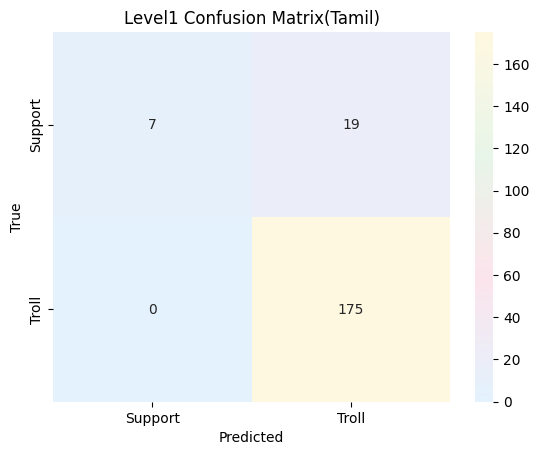

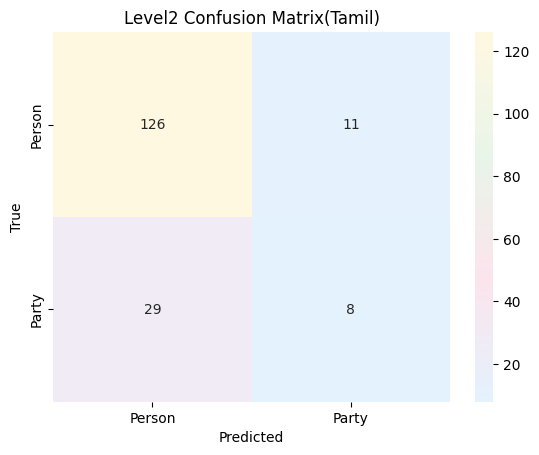

In [89]:
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import confusion_matrix

# New custom light pastel colormap
custom_cmap = LinearSegmentedColormap.from_list(
    "light_pastel",
    ["#E3F2FD", "#FCE4EC", "#E8F5E9", "#FFF8E1"]
)

# Level 1 Confusion Matrix
cm_l1 = confusion_matrix(l1_true, l1_pred)

# Level 2 Confusion Matrix
cm_l2 = confusion_matrix(
    l2_true,
    l2_pred,
    labels=[0, 1]   # Force only 2 classes
)

def plot_confusion_matrix(cm, title, class_names):
    plt.figure()
    
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap=custom_cmap,
        cbar=True
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)

    plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
    plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)

    plt.show()


# Level 1: Troll / Support
plot_confusion_matrix(cm_l1, "Level1 Confusion Matrix(Tamil)", ["Support", "Troll"])

# Level 2: Person / Party
plot_confusion_matrix(cm_l2, "Level2 Confusion Matrix(Tamil)", ["Person", "Party"])

In [37]:
# Check how many unique Tamil sentences are in your validation set
unique_texts_val = df_val['text'].nunique()
total_val = len(df_val)

print(f"Total rows in Validation: {total_val}")
print(f"Unique Tamil sentences: {unique_texts_val}")

if unique_texts_val < total_val:
    print(f"⚠️ Potential Leakage: {total_val - unique_texts_val} rows have repeating text patterns.")


Total rows in Validation: 213
Unique Tamil sentences: 211
⚠️ Potential Leakage: 2 rows have repeating text patterns.


In [38]:
# 1. Get all unique text strings from the training set
train_texts = set(df_train['text'].unique())

# 2. Filter the validation set to ONLY include text that is NOT in the training set
# This removes all augmented "cousins" of training data
strict_val_df = df_val[~df_val['text'].isin(train_texts)].copy()

print(f"Rows in Strict Validation: {len(strict_val_df)}")

if len(strict_val_df) > 0:
    # 3. Create a new loader for these 'unseen' memes
    strict_val_dataset = MultiModalDataset(strict_val_df, tokenizer, feature_extractor)
    strict_val_loader = DataLoader(strict_val_dataset, batch_size=16, shuffle=False)
    
    # 4. Run your evaluation loop again using 'strict_val_loader'
    # (Use the code we used for the 100% report here)
else:
    print("❌ Error: No unique text found in validation. All val rows are variations of training rows.")


Rows in Strict Validation: 194


In [ ]:
from sklearn.metrics import classification_report, f1_score
import numpy as np

# 1. Create the Strict Dataset and Loader
strict_val_dataset = MultiModalDataset(strict_val_df, tokenizer, feature_extractor)
strict_val_loader = DataLoader(strict_val_dataset, batch_size=16, shuffle=False)

model.eval()
l1_true, l1_pred = [], []
l2_true, l2_pred = [], []

with torch.no_grad():
    for batch in strict_val_loader:
        # Move to device
        ids = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        pix = batch['pixel_values'].to(device)
        
        # Get labels
        y1 = batch['label1'].to(device)
        y2 = batch['label2'].to(device)

        # Forward pass
        out1, out2 = model(ids, mask, pix)
        
        # Get predictions
        _, p1 = torch.max(out1, 1)
        _, p2 = torch.max(out2, 1)

        l1_true.extend(y1.cpu().numpy())
        l1_pred.extend(p1.cpu().numpy())
        l2_true.extend(y2.cpu().numpy())
        l2_pred.extend(p2.cpu().numpy())

# Final Report
print("🔥 --- STRICT VALIDATION RESULTS (0% LEAKAGE) --- 🔥")
print(f"Level 1 F1 (Macro): {f1_score(l1_true, l1_pred, average='macro'):.4f}")
print(classification_report(l1_true, l1_pred, target_names=['Support', 'Troll']))

print("\n" + "="*45 + "\n")
print(f"Level 2 F1 (Macro): {f1_score(l2_true, l2_pred, average='macro'):.4f}")
print(classification_report(l2_true, l2_pred)) 


In [ ]:
test_df=pd.read_csv('/kaggle/input/processed-dataset/test_processed.csv')
test_df.head()
test_df=test_df.drop('label',axis=1)

In [ ]:
df_test= load_images_to_dataframe('/kaggle/input/image-datset/STH_Dravidian Datasets/Test/Test_images')
test = pd.merge(test_df, df_test, on='Image_id', how='inner')
test['text'] = test['text'].fillna('').apply(text_preprocessing)
test['text'] = test['text'].apply(text_preprocessing)
test

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import pandas as pd
import numpy as np
from tqdm import tqdm

class TestDataset(Dataset):
    def __init__(self, df, tokenizer, feature_extractor):
        # Reset index to ensure safe .loc access
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.feature_extractor = feature_extractor

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Use your test dataframe column names
        text = str(self.df.loc[idx, 'text'])
        image_arr = self.df.loc[idx, 'Image_name_y'] 

        encoding = self.tokenizer(
            text, 
            padding='max_length', 
            truncation=True, 
            max_length=128, # Match training max_length
            return_tensors='pt'
        )

        image_pil = Image.fromarray(image_arr.astype('uint8')).convert("RGB")
        pixel_values = self.feature_extractor(images=image_pil, return_tensors='pt')['pixel_values'].squeeze(0)

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'pixel_values': pixel_values
        }

# 1. Initialize Dataset and Loader
test_dataset = TestDataset(test, tokenizer, feature_extractor)
test_loader = DataLoader(test_dataset, batch_size=16)

# 2. Evaluation Mode
model1.eval()

# Lists to store predictions
l1_preds = []
l2_preds = []

print("Starting Inference on Test Data...")
with torch.no_grad():
    for batch in tqdm(test_loader):
        # Access by keys to match updated Dataset
        ids = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        pix = batch['pixel_values'].to(device)

        # Get both Level 1 and Level 2 outputs
        out1, out2 = model1(ids, mask, pix)
        
        # Get class indices
        _, pred1 = torch.max(out1, 1)
        _, pred2 = torch.max(out2, 1)

        l1_preds.extend(pred1.cpu().numpy())
        l2_preds.extend(pred2.cpu().numpy())

# 3. Save results to the test dataframe
test['label1_pred'] = l1_preds
test['label2_pred'] = l2_preds

# 4. Export to CSV (assuming your test set has 'Image_id')
prediction_df_new = pd.DataFrame({
    'Image_id': test['Image_id'],
    'label1_prediction': test['label1_pred'],
    'label2_prediction': test['label2_pred']
})




In [ ]:
def map_meme_labels(row):
    l1 = row['label1_prediction']
    l2 = row['label2_prediction']
    
    # Logic 1: Both are 0
    if l1 == 0 and l2 == 0:
        return "Support/Praise", "Support for person"
    
    # Logic 2: label1 is 0 and label2 is 1
    elif l1 == 0 and l2 == 1:
        return "Support/Praise", "Support for party"
    
    # Logic 3: label1 is 1 and label2 is 0
    elif l1 == 1 and l2 == 0:
        return "Troll/Oppose", "Troll/Oppose Against Person"
    
    # Logic 4: Both are 1
    elif l1 == 1 and l2 == 1:
        return "Troll/Oppose", "Troll/Oppose Against Party"
    
    return "Unknown", "Unknown"

# 1. Apply the logic to create Level1 and Level2 columns
prediction_df_new[['Level1', 'Level2']] = prediction_df_new.apply(
    lambda row: pd.Series(map_meme_labels(row)), axis=1
)

# 2. Insert the Image_name column from your test data
prediction_df_new['Image_name'] = test['Image_name_x'].values

# 3. Reorder columns specifically: Image_id, Image_name, Level1, Level2
final_csv = prediction_df_new[['Image_id', 'Image_name', 'Level1', 'Level2']]

# 4. Save to CSV
final_csv.to_csv('Tamil_mbert_VIT.csv', index=False)

print("Final CSV saved with the requested column order!")
print(final_csv.head())

CLIP+Xlm Roberta

In [39]:
import torch
from transformers import AutoTokenizer, AutoModel, CLIPModel, CLIPProcessor, ViTFeatureExtractor
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from PIL import Image

class MultiModalDataset(Dataset):
    def __init__(self, df, tokenizer, feature_extractor):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.feature_extractor = feature_extractor

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = str(self.df.loc[idx, 'text'])
        image_arr = self.df.loc[idx, 'Image_name_y'] 
        l1 = self.df.loc[idx, 'label1']
        l2 = self.df.loc[idx, 'label2']

        encoding = self.tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        
        # Image processing
        image = Image.fromarray(image_arr.astype('uint8')).convert("RGB")
        #pixel_values = self.feature_extractor(images=image, return_tensors='pt')['pixel_values'].squeeze(0)
        pixel_values = clip_processor(images=image, return_tensors='pt')['pixel_values'].squeeze(0)
        # Return DICTIONARY
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'pixel_values': pixel_values,
            'label1': torch.tensor(l1, dtype=torch.long),
            'label2': torch.tensor(l2, dtype=torch.long)
        }   


tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
roberta_model = AutoModel.from_pretrained('xlm-roberta-base')

clip_processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')
clip_model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
#efficientnet_model.classifier = nn.Identity()  

class MultiModal(nn.Module):
    def __init__(self, roberta_model, clip_model, num_classes_l1, num_classes_l2):
        super(MultiModal, self).__init__()
        self.roberta_model = roberta_model
        # Use ONLY the vision part of CLIP
        self.clip_vision_model = clip_model.vision_model 
        
        # XLM-R base is 768, CLIP vision-base is 768 -> Total 1536
        self.classifier_l1 = nn.Linear(1536, num_classes_l1)
        self.classifier_l2 = nn.Linear(1536, num_classes_l2)
        self.dropout = nn.Dropout(0.3)

    def forward(self, input_ids, attention_mask, pixel_values):
        # 1. Text features (XLM-R)
        roberta_output = self.roberta_model(input_ids=input_ids, attention_mask=attention_mask)
        # XLM-R doesn't always have a pooler_output like BERT, 
        # using the mean of hidden states or the first token [CLS/<s>] is safer
        text_features = roberta_output.last_hidden_state[:, 0, :] 

        # 2. Vision features (CLIP Vision)
        # We call .vision_model directly to avoid the text-input requirement
        clip_output = self.clip_vision_model(pixel_values=pixel_values)
        vision_features = clip_output.pooler_output 

        # 3. Fusion
        combined = torch.cat((text_features, vision_features), dim=1)
        combined = self.dropout(combined)
        
        logits_l1 = self.classifier_l1(combined)
        logits_l2 = self.classifier_l2(combined)
        
        return logits_l1, logits_l2


train_dataset = MultiModalDataset(df_train, tokenizer, feature_extractor)
dev_dataset = MultiModalDataset(df_val, tokenizer, feature_extractor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=16)


# Initialize
num_l1 = 2 # Troll/Support
num_l2 = 2 # Person/Party
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model2 = MultiModal(roberta_model, clip_model, num_l1, num_l2).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model2.parameters(), lr=2e-5) # AdamW is better for BERT/ViT


for epoch in range(10): # 10 is usually enough for fine-tuning
  model2.train()
  total_loss = 0
  for batch in train_loader:
        # Now batch is a dictionary!
        ids = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        pixels = batch['pixel_values'].to(device)
        lab1 = batch['label1'].to(device)
        lab2 = batch['label2'].to(device)

        optimizer.zero_grad()
        # Ensure your model forward function returns both out1 and out2
        out1, out2 = model2(ids, mask, pixels)
        
        #loss = criterion(out1, lab1) + criterion(out2, lab2)
        loss1 = criterion(out1, lab1)
        loss2 = criterion(out2, lab2)
        loss = (0.5 * loss1) + (1.5 * loss2)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
  print(f"Epoch {epoch+1} | Loss: {total_loss/len(train_loader):.4f}")


Epoch 1 | Loss: 1.0541
Epoch 2 | Loss: 0.2556
Epoch 3 | Loss: 0.0655
Epoch 4 | Loss: 0.1878
Epoch 5 | Loss: 0.0492
Epoch 6 | Loss: 0.0209
Epoch 7 | Loss: 0.0471
Epoch 8 | Loss: 0.1816
Epoch 9 | Loss: 0.0871
Epoch 10 | Loss: 0.1117


In [ ]:
model2.eval()
l1_true, l1_pred = [], []
l2_true, l2_pred = [], []

with torch.no_grad():
    for batch in dev_loader:
        ids, mask, pix = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['pixel_values'].to(device)
        y1, y2 = batch['label1'].to(device), batch['label2'].to(device)

        out1, out2 = model2(ids, mask, pix)
        _, p1 = torch.max(out1, 1)
        _, p2 = torch.max(out2, 1)

        l1_true.extend(y1.cpu().numpy()); l1_pred.extend(p1.cpu().numpy())
        l2_true.extend(y2.cpu().numpy()); l2_pred.extend(p2.cpu().numpy())

from sklearn.metrics import f1_score
print(f"Level 1 F1: {f1_score(l1_true, l1_pred, average='macro'):.4f}")
print(f"Level 2 F1: {f1_score(l2_true, l2_pred, average='macro'):.4f}")


In [40]:
test_df=pd.read_csv('/kaggle/input/processed-dataset/test_processed.csv')
test_df.head()
test_df=test_df.drop('label',axis=1)

In [41]:
df_test= load_images_to_dataframe('/kaggle/input/image-datset/STH_Dravidian Datasets/Test/Test_images')
test = pd.merge(test_df, df_test, on='Image_id', how='inner')
test['text'] = test['text'].fillna('').apply(text_preprocessing)
test['text'] = test['text'].apply(text_preprocessing)
test

,Image_id,Image_name_x,Level1,Level2,text,Image_name_y
0,1,001.jpg,NaN,NaN,வபய் ரபர் ரப்பி கேட்டிங்களா x அந் அறத் தத ப ஆக...,"[[[210, 210, 210], [210, 210, 210], [210, 210,..."
1,6,006.jpg,NaN,NaN,இ எனக்கோ க் ட் கபீவுள் நம்பிக்கை அபாய வாடு டன ...,"[[[103, 79, 66], [220, 183, 140], [236, 190, 1..."
2,15,015.jpg,NaN,NaN,நாட்டில் அனைத்து பொதுத்துறை நிறுவனங்களையும் தன...,"[[[58, 58, 58], [58, 58, 58], [58, 58, 58], [5..."
3,23,023.jpg,NaN,NaN,அம் ஃஏ ட் ட டி Bரேந் இ ஏ இ ் த ம்ந் ம் ய க ப்ப...,"[[[32, 24, 20], [30, 24, 20], [30, 25, 22], [2..."
4,24,024.jpg,NaN,NaN,ர டர் ணி இ அ ட்ப அஏ ர் ஷ் ட ஆசி ஆ ட நு அஸி த ஷ...,"[[[55, 55, 55], [24, 24, 24], [22, 22, 22], [2..."
...,...,...,...,...,...,...
196,974,974.jpg,NaN,NaN,இவ்வளவு அசம்பாவிதம் நடந்தும் குடும்பத்தில் அம்...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
197,979,979.jpg,NaN,NaN,படத்துக்காக அவனை கொடநாடு கேட்டுவாசல நிக்கவச்சே...,"[[[64, 66, 68], [64, 66, 68], [64, 66, 68], [6..."
198,990,990.jpg,NaN,NaN,Wஃஆட் ஆ ங்ருEஆட் ஷ்ட்EP Kஅர்நதக Cம் ஷித்தரமைஅஹ...,"[[[172, 172, 172], [174, 174, 174], [175, 175,..."
199,993,993.jpg,NaN,NaN,அ தன்னால் போர் நிறுத்தம் சாத்தியமானது மார்தட்ட...,"[[[24, 25, 31], [24, 25, 31], [24, 24, 33], [2..."


In [42]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
import torch
import numpy as np

# 1. Put model in evaluation mode
model2.eval()

# Storage for ground truth and predictions
l1_true, l1_pred = [], []
l2_true, l2_pred = [], []

print("🚀 Starting Evaluation on Tamil Validation Set...")

with torch.no_grad():
    for batch in dev_loader:
        # Move inputs to device
        ids = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        pix = batch['pixel_values'].to(device)
        
        # Get true labels
        y1 = batch['label1'].to(device)
        y2 = batch['label2'].to(device)

        # Forward pass (XLM-R + CLIP)
        out1, out2 = model2(ids, mask, pix)
        
        # Get predicted class indices
        _, p1 = torch.max(out1, 1)
        _, p2 = torch.max(out2, 1)

        # Store for report
        l1_true.extend(y1.cpu().numpy())
        l1_pred.extend(p1.cpu().numpy())
        l2_true.extend(y2.cpu().numpy())
        l2_pred.extend(p2.cpu().numpy())

# 2. Define Category Names for clarity
# Adjust these based on your specific Malayalam mapping
target_names_l1 = ['SUPPORT', 'TROLL/ OPPOSE']
target_names_l2 = ['Person', 'Party']

# 3. Generate and Print Reports
print("\n" + "="*60)
print("📊 LEVEL 1: OVERALL SENTIMENT (Troll vs. Support)")
print("="*60)
print(classification_report(l1_true, l1_pred, target_names=target_names_l1, digits=4))

print("\n" + "="*60)
print("📊 LEVEL 2: TARGET CLASSIFICATION (Person/Party)")
print("="*60)

print(classification_report(l2_true, l2_pred, target_names=target_names_l2, labels=[0, 1], digits=4))


🚀 Starting Evaluation on Tamil Validation Set...

📊 LEVEL 1: OVERALL SENTIMENT (Troll vs. Support)
               precision    recall  f1-score   support

      SUPPORT     0.7875    0.9692    0.8690        65
TROLL/ OPPOSE     0.9850    0.8851    0.9324       148

     accuracy                         0.9108       213
    macro avg     0.8862    0.9272    0.9007       213
 weighted avg     0.9247    0.9108    0.9130       213


📊 LEVEL 2: TARGET CLASSIFICATION (Person/Party)
              precision    recall  f1-score   support

      Person     1.0000    0.9672    0.9833       122
       Party     0.9579    1.0000    0.9785        91

    accuracy                         0.9812       213
   macro avg     0.9789    0.9836    0.9809       213
weighted avg     0.9820    0.9812    0.9813       213



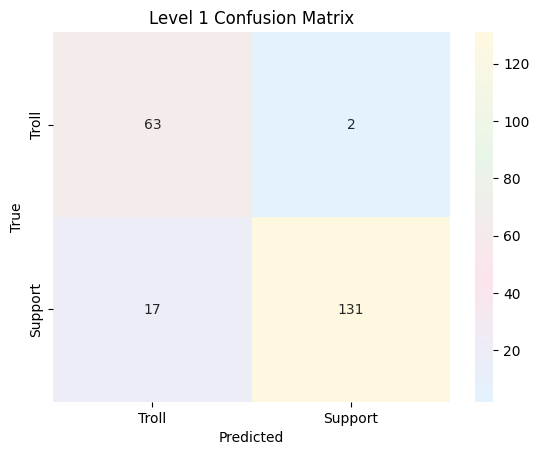

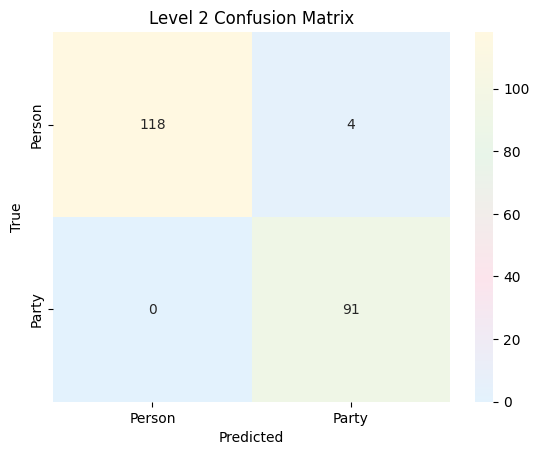

In [43]:
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import confusion_matrix

# New custom light pastel colormap
custom_cmap = LinearSegmentedColormap.from_list(
    "light_pastel",
    ["#E3F2FD", "#FCE4EC", "#E8F5E9", "#FFF8E1"]
)

# Level 1 Confusion Matrix
cm_l1 = confusion_matrix(l1_true, l1_pred)

# Level 2 Confusion Matrix
cm_l2 = confusion_matrix(l2_true, l2_pred)


def plot_confusion_matrix(cm, title, class_names):
    plt.figure()
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap=custom_cmap,
        cbar=True
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
    plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
    plt.show()


# Level 1: Troll / Support
plot_confusion_matrix(cm_l1, "Level 1 Confusion Matrix", ["Troll", "Support"])

# Level 2: Person / Party
plot_confusion_matrix(cm_l2, "Level 2 Confusion Matrix(Tamil)", ["Person", "Party"]) 

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import pandas as pd
import numpy as np
from tqdm import tqdm

class TestDataset(Dataset):
    def __init__(self, df, tokenizer, clip_processor):
        # Reset index to ensure safe .loc access
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.clip_processor = clip_processor

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Using 'text' and 'Image_name_y' (numpy array) columns
        text = str(self.df.loc[idx, 'text'])
        image_arr = self.df.loc[idx, 'Image_name_y'] 

        encoding = self.tokenizer(
            text, 
            padding='max_length', 
            truncation=True, 
            max_length=128, 
            return_tensors='pt'
        )

        # CLIP specific image processing
        image_pil = Image.fromarray(image_arr.astype('uint8')).convert("RGB")
        pixel_values = self.clip_processor(images=image_pil, return_tensors='pt')['pixel_values'].squeeze(0)

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'pixel_values': pixel_values
        }

# 1. Initialize Dataset and Loader using clip_processor
test_dataset = TestDataset(test, tokenizer, clip_processor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 2. Evaluation Mode
model2.eval()

# Lists to store predictions
l1_preds = []
l2_preds = []

print("Starting Inference on Test Data (XLM-R + CLIP)...")
with torch.no_grad():
    for batch in tqdm(test_loader):
        # Dictionary access
        ids = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        pix = batch['pixel_values'].to(device)

        # Multi-output model call
        out1, out2 = model2(ids, mask, pix)
        
        # Get winning class indices
        _, pred1 = torch.max(out1, 1)
        _, pred2 = torch.max(out2, 1)

        l1_preds.extend(pred1.cpu().numpy())
        l2_preds.extend(pred2.cpu().numpy())

# 3. Create prediction dataframe
predictions_df = pd.DataFrame({
    'Image_id': test['Image_id'],
    'label1_prediction': l1_preds,
    'label2_prediction': l2_preds
})






In [ ]:
def map_meme_labels(row):
    l1 = row['label1_prediction']
    l2 = row['label2_prediction']
    
    # Logic 1: Both are 0
    if l1 == 0 and l2 == 0:
        return "Support/Praise", "Support for person"
    
    # Logic 2: label1 is 0 and label2 is 1
    elif l1 == 0 and l2 == 1:
        return "Support/Praise", "Support for party"
    
    # Logic 3: label1 is 1 and label2 is 0
    elif l1 == 1 and l2 == 0:
        return "Troll/Oppose", "Troll/Oppose Against Person"
    
    # Logic 4: Both are 1
    elif l1 == 1 and l2 == 1:
        return "Troll/Oppose", "Troll/Oppose Against Party"
    
    # Fallback for any other combinations (optional)
    return "Unknown", "Unknown"

# 1. Apply the logic across the dataframe
# This creates two new columns based on your rules
predictions_df[['Level1', 'Level2']] = predictions_df.apply(
    lambda row: pd.Series(map_meme_labels(row)), axis=1
)

# 2. Add the Image_name column from your test data
# Assuming 'Image_name_x' contains values like '000.jpg'
predictions_df['Image_name'] = test['Image_name_x'].values




In [ ]:
predictions_df=predictions_df[['Image_id', 'Image_name', 'Level1', 'Level2']]

predictions_df.head()

In [ ]:
predictions_df.to_csv('Final_csv_Roberta-CLIP.csv', index=False)

print("Final CSV saved with the requested column order!")


# Indic + Resnet

In [ ]:
#from huggingface_hub import notebook_login
# This will open a widget to enter your token
#notebook_login() 


In [ ]:
from huggingface_hub import notebook_login
notebook_login() 

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from PIL import Image


image_transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

class MultiModalDataset(Dataset):
    def __init__(self, df, tokenizer, image_transform):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.image_transform = image_transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = str(self.df.loc[idx, 'text'])
        image_arr = self.df.loc[idx, 'Image_name_y'] 
        l1 = self.df.loc[idx, 'label1']
        l2 = self.df.loc[idx, 'label2']

        encoding = self.tokenizer(
            text, padding='max_length', truncation=True, max_length=128, return_tensors='pt'
        )

        image = Image.fromarray(image_arr.astype('uint8')).convert("RGB")
        image = self.image_transform(image)

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'pixel_values': image,
            'label1': torch.tensor(l1, dtype=torch.long),
            'label2': torch.tensor(l2, dtype=torch.long)
        }


class MultiModal(nn.Module):
    def __init__(self, indicbert_model, resnet_model, num_l1, num_l2):
        super(MultiModal, self).__init__()
        self.indicbert_model = indicbert_model
        self.resnet_model = resnet_model
        
        # 768 (IndicBERT) + 2048 (ResNet50) = 2816
        self.classifier_l1 = nn.Linear(2816, num_l1)
        self.classifier_l2 = nn.Linear(2816, num_l2)
        self.dropout = nn.Dropout(0.3)

    def forward(self, input_ids, attention_mask, pixel_values):
        # Text features (Mean Pooling)
        text_out = self.indicbert_model(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state
        text_features = torch.mean(text_out, dim=1)

        # Image features
        vision_features = self.resnet_model(pixel_values)

        # Fusion
        combined = torch.cat((text_features, vision_features), dim=1)
        combined = self.dropout(combined)
        
        return self.classifier_l1(combined), self.classifier_l2(combined)


tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')
indicbert_model = AutoModel.from_pretrained('ai4bharat/indic-bert')

resnet_model = models.resnet50(pretrained=True)
resnet_model.fc = nn.Identity() 

model3 = MultiModal(indicbert_model, resnet_model, num_l1=2, num_l2=2).to(device)
optimizer = optim.AdamW(model3.parameters(), lr=2e-5) # Use AdamW and lower LR for BERT
criterion = nn.CrossEntropyLoss()

# Loaders
train_loader = DataLoader(MultiModalDataset(df_train, tokenizer, image_transform), batch_size=16, shuffle=True)
dev_loader = DataLoader(MultiModalDataset(df_val, tokenizer, image_transform), batch_size=16)

for epoch in range(10):
    model3.train()
    total_loss = 0
    for batch in train_loader:
        ids, mask = batch['input_ids'].to(device), batch['attention_mask'].to(device)
        pix = batch['pixel_values'].to(device)
        lab1, lab2 = batch['label1'].to(device), batch['label2'].to(device)

        optimizer.zero_grad()
        out1, out2 = model3(ids, mask, pix)
        
        # Combine losses
        loss = criterion(out1, lab1) + criterion(out2, lab2)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1} | Loss: {total_loss/len(train_loader):.4f}")  

In [ ]:
from sklearn.metrics import classification_report, f1_score
import torch
import numpy as np

def evaluate_multimodal_model(model, dev_loader, device):
    model3.eval()
    
    # Storage for ground truth and predictions
    l1_true, l1_pred = [], []
    l2_true, l2_pred = [], []

    print("Running Evaluation on Validation Set...")
    
    with torch.no_grad():
        for batch in dev_loader:
            # Move data to device
            ids = batch['input_ids'].to(device)
            mask = batch['attention_mask'].to(device)
            pix = batch['pixel_values'].to(device)
            y1 = batch['label1'].to(device)
            y2 = batch['label2'].to(device)

            # Forward pass
            out1, out2 = model3(ids, mask, pix)
            
            # Get predictions (indices of max logit)
            _, p1 = torch.max(out1, 1)
            _, p2 = torch.max(out2, 1)

            # Move to CPU for sklearn
            l1_true.extend(y1.cpu().numpy())
            l1_pred.extend(p1.cpu().numpy())
            l2_true.extend(y2.cpu().numpy())
            l2_pred.extend(p2.cpu().numpy())

    # --- Level 1 Metrics ---
    f1_l1 = f1_score(l1_true, l1_pred, average='macro')
    # Assuming 0: Support, 1: Troll
    report_l1 = classification_report(l1_true, l1_pred, target_names=['Support', 'Troll'])

    # --- Level 2 Metrics ---
    f1_l2 = f1_score(l2_true, l2_pred, average='macro')
    # Update these names if your labels are different
    report_l2 = classification_report(l2_true, l2_pred)

    print("\n" + "="*50)
    print(f"RESULTS FOR INDIC-BERT + RESNET50")
    print("="*50)
    print(f"LEVEL 1 (Troll/Support) F1: {f1_l1:.4f}")
    print(report_l1)
    print("-" * 30)
    print(f"LEVEL 2 (Target Type) F1: {f1_l2:.4f}")
    print(report_l2)
    print("="*50)

# Run the evaluation
evaluate_multimodal_model(model3, dev_loader, device)


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import pandas as pd
import numpy as np
from tqdm import tqdm

class IndicResNetTestDataset(Dataset):
    def __init__(self, df, tokenizer, image_transform):
        # Reset index for safe .loc access
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.image_transform = image_transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Using 'text' and 'Image_name_y' (numpy array) columns
        text = str(self.df.loc[idx, 'text'])
        image_arr = self.df.loc[idx, 'Image_name_y'] 

        encoding = self.tokenizer(
            text, padding='max_length', truncation=True, max_length=128, return_tensors='pt'
        )

        # Image processing for ResNet
        image_pil = Image.fromarray(image_arr.astype('uint8')).convert("RGB")
        image_tensor = self.image_transform(image_pil)

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'pixel_values': image_tensor
        }

# --- Initialization ---
test_dataset = IndicResNetTestDataset(test, tokenizer, image_transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model3.eval()
l1_preds, l2_preds = [], []

print("🚀 Starting Inference (IndicBERT + ResNet50)...")

with torch.no_grad():
    for batch in tqdm(test_loader):
        ids = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        pix = batch['pixel_values'].to(device)

        # Forward pass returns (out_l1, out_l2)
        out1, out2 = model3(ids, mask, pix)
        
        _, pred1 = torch.max(out1, 1)
        _, pred2 = torch.max(out2, 1)

        l1_preds.extend(pred1.cpu().numpy())
        l2_preds.extend(pred2.cpu().numpy())

# Add raw predictions to a temporary dataframe
temp_df = pd.DataFrame({
    'Image_id': test['Image_id'],
    'Image_name_x': test['Image_name_x'],
    'label1_prediction': l1_preds,
    'label2_prediction': l2_preds
})


In [ ]:
def apply_final_logic(row):
    l1 = row['label1_prediction']
    l2 = row['label2_prediction']
    
    if l1 == 0 and l2 == 0:
        return "Support/Praise", "Support for individual person"
    elif l1 == 0 and l2 == 1:
        return "Support/Praise", "Support for Party"
    elif l1 == 1 and l2 == 0:
        return "Troll/Oppose", "Troll against individual person"
    elif l1 == 1 and l2 == 1:
        return "Troll/Oppose", "Troll/Oppose Against party"
    return "Unknown", "Unknown"

# Apply the logic
temp_df[['Level1', 'Level2']] = temp_df.apply(
    lambda row: pd.Series(apply_final_logic(row)), axis=1
)

# Create final dataframe with specific column order
final_csv = temp_df[['Image_id', 'Image_name_x', 'Level1', 'Level2']]
final_csv.columns = ['Image_id', 'Image_name', 'Level1', 'Level2']

# Save result
final_csv.to_csv('Final_csv_IndicBert.csv', index=False)

print("\n✅ Final CSV Saved")
print(final_csv.head())


In [ ]:
# See the text for predicted Support memes
support_memes = final_csv[final_csv['Level1'] == 'Support/Praise']
print(f"Memes predicted as Support: {len(support_memes)}")

# Print the Tamil text for these to see if they are actually Support
indices = support_memes.index
for i in indices[:5]:
    print(f"ID: {final_csv.loc[i, 'Image_id']} | Text: {test.loc[i, 'text']}")
